<a href="https://colab.research.google.com/github/AlexKressner/Business_Intelligence/blob/main/ML_Fallstudie_Obesity_L%C3%B6sung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Fallstudie Obesity
Sie finden in unserem [Repo](https://github.com/AlexKressner/Business_Intelligence) unter `Daten/Obesity/` Daten zur Schätzung der Adipositaslevel von Personen aus den Ländern Mexiko, Peru und Kolumbien, im Alter zwischen 14 und 61 Jahren, mit unterschiedlichen Essgewohnheiten und körperlicher Verfassung. Die Daten wurden mit Hilfe einer Webplattform gesammelt, auf der anonyme Nutzer jede Frage eines Fragebogens beantworteten. Anschließend wurden die Informationen verarbeitet, wobei 17 Attribute und 2111 Datensätze erhalten wurden.

Die mit den Essgewohnheiten verbundenen Attribute sind: Häufiger Konsum von hochkalorischen Lebensmitteln (FAVC), Häufigkeit des täglichen Gemüsekonsums (FCVC), Anzahl der Hauptmahlzeiten pro Tag (NCP), Konsum von Nahrungsmitteln zwischen den Mahlzeiten (CAEC), täglicher Wasserkonsum (CH20) und Alkoholkonsum (CALC).

Die mit der körperlichen Verfassung verbundenen Attribute sind: Überwachung des Kalorienverbrauchs (SCC), Häufigkeit körperlicher Aktivitäten (FAF), Zeit, die mit Technologiegeräten verbracht wird (TUE), genutztes Verkehrsmittel (MTRANS) und die erhaltenen Variablen: Geschlecht, Alter, Größe und Gewicht.

Die verschiedenen Adipositatswerte (in der Spalte `ObesityLevel`) sind:

- Untergewicht
- Normalgewicht
- Übergewicht_I
- Übergewicht_II
- Adipositas_I
- Adipositas_II
- Adipositas_III

Die Daten stammen von [Kaggle](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster). Ihre Aufgabe besteht darin, ein geeignetes Modell zur Vorhersage des Adipositatlevels basierend auf den gegebenen Features zu erstellen. Beantworten Sie dafür die folgenden Fragestellungen bzw. gehen Sie wie folgt vor:

1. **Vorüberlegung**: Wenn Sie das Adipositaslevel einer Person vorhersagen, handelt es sich um eine Regression oder Klassifikation?

2. **Datenexploration**:
- Wie viele Features gibt es?
- Gibt es fehlende Werte bei den Features?
- Wie sind die numerischen Features verteilt, d.h. berechnen Sie Kenngrößen wie den Mittelwert, Median, Quartile, etc.? Hinweis: Dafür gibt es eine Funktion!
- Wie ist die Korrelation zwischen dem Target und den Features? Hinweis: Dafür gibt es eine Funktion!

3. **Feature Engineering**:
- Achte Sie auf die Datentypen beim Erstellen von Features!
- Gibt es aus Ihrer Sicht weitere interessante Features, die Sie aus den Daten ableiten können?

4. **Modell trainieren und bewerten**:
- Entwickeln Sie ein Modell, mit dem Sie das Adipositaslevel einer Person basierend auf den zur Verfügung stehenden Features schätzen können.
- Optimieren Sie die Hyperparamter Ihres Modells.
- Können Sie Prognosegüte erhöhen, wenn Sie zwei Modelle trainieren? Ein Modell schätzt das Adipositaslevels für Männer, das andere für Frauen.

5. **Prognose**: Schätzen Sie das Adipositaslevel einer beliebigen Person.

In [65]:
! git clone https://github.com/AlexKressner/Business_Intelligence

fatal: destination path 'Business_Intelligence' already exists and is not an empty directory.


In [66]:
import pandas as pd

In [67]:
file_path = "./Business_Intelligence/Daten/Obesity/ObesityDataSet.csv"

In [68]:
df = pd.read_csv(file_path)

In [69]:
columns = {
    "FAVC": "Häufigkeit_Konsum_hochkalorischer_Lebensmitteln",
    "FCVC": "Häufigkeit_täglicher_Gemüsekonsums",
    "NCP": "Hauptmahlzeiten_pro_Tag",
    "CAEC": "Konsum_Nahrungsmittel_zwischen_Mahlzeiten",
    "CH2O": "täglicher_Wasserkonsum",
    "CALC": "Alkoholkonsum ",
    "SCC": "Überwachung_Kalorienverbrauch",
    "FAF": "Häufigkeit_körperlicher_Aktivitäten",
    "TUE": "Zeit_mit_Technologiegeräten",
    "MTRANS": "Genutzte_Verkehrsmittel",
}

In [70]:
df.rename(columns=columns, inplace=True)

In [71]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Häufigkeit_Konsum_hochkalorischer_Lebensmitteln,Häufigkeit_täglicher_Gemüsekonsums,Hauptmahlzeiten_pro_Tag,Konsum_Nahrungsmittel_zwischen_Mahlzeiten,SMOKE,täglicher_Wasserkonsum,Überwachung_Kalorienverbrauch,Häufigkeit_körperlicher_Aktivitäten,Zeit_mit_Technologiegeräten,Alkoholkonsum,Genutzte_Verkehrsmittel,ObesityLevel
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Datenexploration

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Gender                                           2111 non-null   object 
 1   Age                                              2111 non-null   float64
 2   Height                                           2111 non-null   float64
 3   Weight                                           2111 non-null   float64
 4   family_history_with_overweight                   2111 non-null   object 
 5   Häufigkeit_Konsum_hochkalorischer_Lebensmitteln  2111 non-null   object 
 6   Häufigkeit_täglicher_Gemüsekonsums               2111 non-null   float64
 7   Hauptmahlzeiten_pro_Tag                          2111 non-null   float64
 8   Konsum_Nahrungsmittel_zwischen_Mahlzeiten        2111 non-null   object 
 9   SMOKE                         

In [73]:
print(f"Anzahl der Features: {df.shape[1]-1}")

Anzahl der Features: 16


In [74]:
df.describe()

,Age,Height,Weight,Häufigkeit_täglicher_Gemüsekonsums,Hauptmahlzeiten_pro_Tag,täglicher_Wasserkonsum,Häufigkeit_körperlicher_Aktivitäten,Zeit_mit_Technologiegeräten
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Korrelationskoeffizienten
Die Pearson-, Kendall- und Spearman-Korrelationskoeffizienten sind statistische Maßzahlen, die die Stärke und Richtung der Beziehung zwischen zwei Variablen messen. Jeder dieser Koeffizienten wird unter verschiedenen Umständen und für unterschiedliche Datentypen verwendet.

**Pearson-Korrelation**
Die Pearson-Korrelation misst den linearen Zusammenhang zwischen zwei stetigen Variablen. Sie wird verwendet, wenn beide Variablen auf einem intervallskalierten Niveau gemessen werden und eine annähernd normale Verteilung aufweisen. Bsp.: Beziehung zwischen Körpergröße und Gewicht oder Zusammenhang zwischen Studienzeit und Prüfungsergebnissen

**Spearman-Rangkorrelation**
Spearman misst den monotonen Zusammenhang zwischen zwei Variablen anhand ihrer Rangwerte. Es wird verwendet, wenn die Daten nicht normal verteilt sind oder eine nichtlineare Beziehung vorliegt. Es ist auch für ordinalskalierte Daten geeignet. Bsp.: Beziehung zwischen Bildungsniveau und Einkommen oder Alter und Medikamentenwirkung

In [75]:
df.ObesityLevel.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [76]:
ordinal_encoder = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II':5,
    'Obesity_Type_III':6
}

In [77]:
df["Obesity_Encoded"] = df["ObesityLevel"].replace(ordinal_encoder)

In [78]:
corr = df.corr()
corr

<ipython-input-78-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Height,Weight,Häufigkeit_täglicher_Gemüsekonsums,Hauptmahlzeiten_pro_Tag,täglicher_Wasserkonsum,Häufigkeit_körperlicher_Aktivitäten,Zeit_mit_Technologiegeräten,Obesity_Encoded
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.282913
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.133565
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.913251
Häufigkeit_täglicher_Gemüsekonsums,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.227759
Hauptmahlzeiten_pro_Tag,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.026690
täglicher_Wasserkonsum,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.133008
Häufigkeit_körperlicher_Aktivitäten,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.199901
Zeit_mit_Technologiegeräten,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.107991
Obesity_Encoded,0.282913,0.133565,0.913251,0.227759,0.026690,0.133008,-0.199901,-0.107991,1.000000


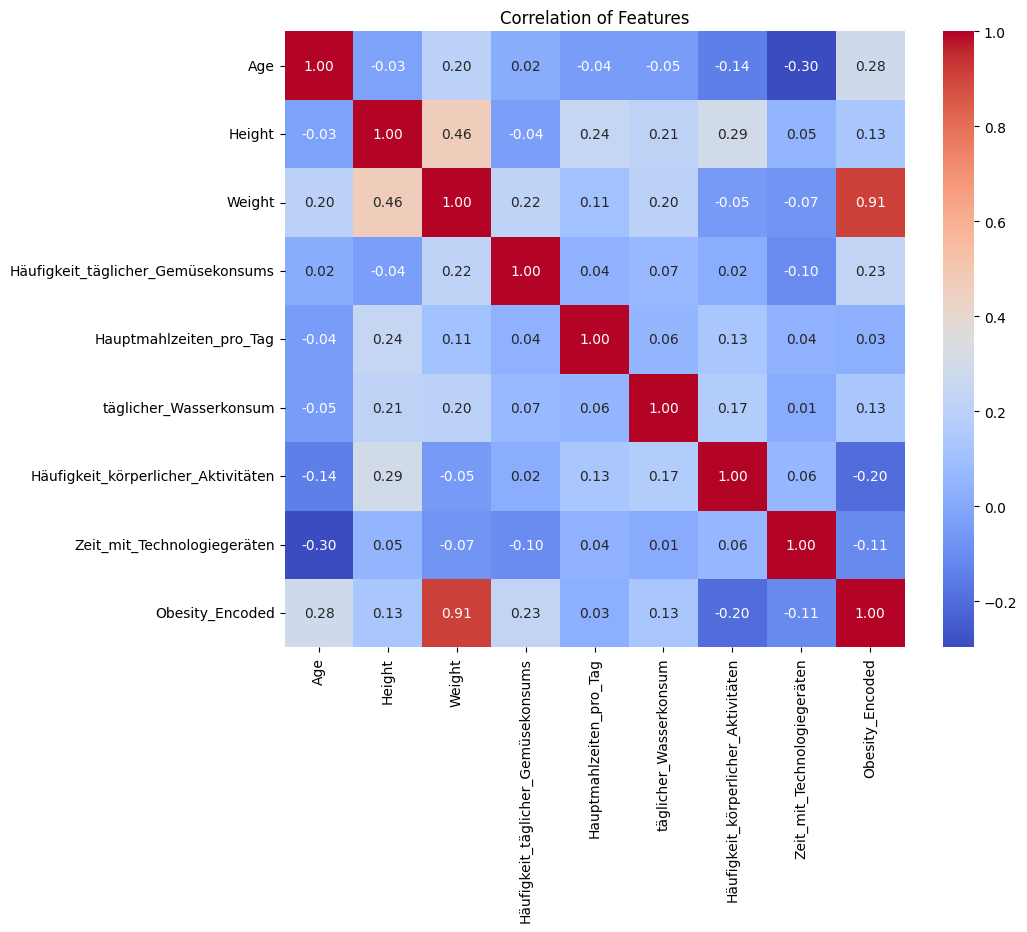

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation of Features')
plt.show()


In [80]:
correlated_features = [
    "Obesity_Encoded",
    "Weight",
    "Age",
    ]

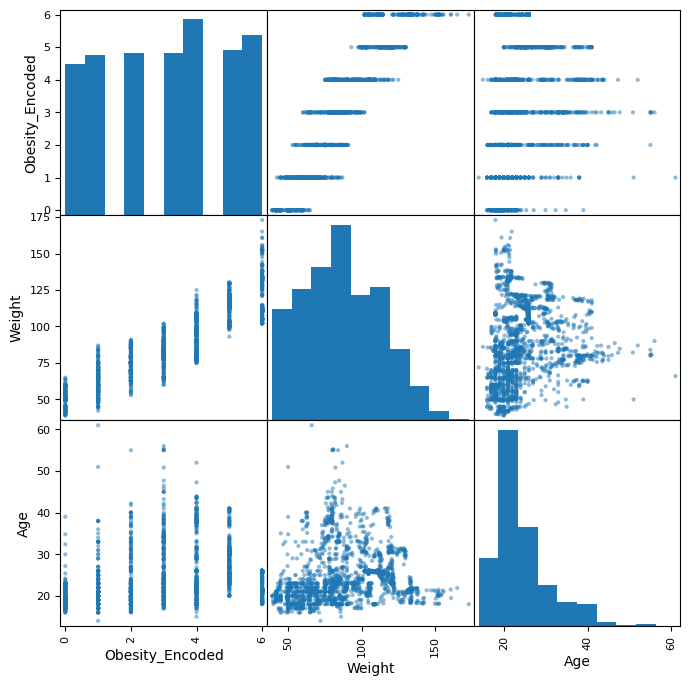

In [81]:
pd.plotting.scatter_matrix(df[correlated_features], figsize=(8,8))
plt.show()

<Axes: >

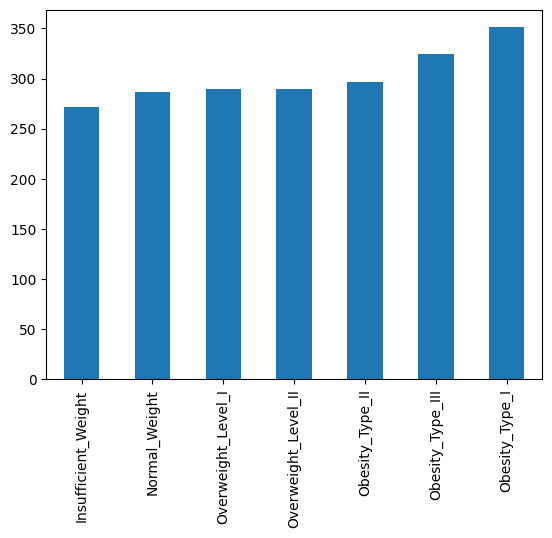

In [82]:
df["ObesityLevel"].value_counts().sort_values().plot(kind="bar")

## Feature Engineering

In [83]:
df["BMI"] = df["Weight"]/df["Height"]**2

In [84]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,Häufigkeit_Konsum_hochkalorischer_Lebensmitteln,Häufigkeit_täglicher_Gemüsekonsums,Hauptmahlzeiten_pro_Tag,Konsum_Nahrungsmittel_zwischen_Mahlzeiten,SMOKE,täglicher_Wasserkonsum,Überwachung_Kalorienverbrauch,Häufigkeit_körperlicher_Aktivitäten,Zeit_mit_Technologiegeräten,Alkoholkonsum,Genutzte_Verkehrsmittel,ObesityLevel,Obesity_Encoded,BMI
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,6,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,6,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,6,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,6,44.071535
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III,6,44.144338


In [85]:
df['Age'] = round(df['Age'],0).astype("int")

In [86]:
df['Height'] = round(df['Height']*100,0).astype("int")
df['Weight'] = round(df['Weight'],0).astype("int")

In [87]:
cols = ["Häufigkeit_täglicher_Gemüsekonsums","Hauptmahlzeiten_pro_Tag","täglicher_Wasserkonsum","Häufigkeit_körperlicher_Aktivitäten","Zeit_mit_Technologiegeräten"]

In [88]:
for col in cols:
    df[col] = round(df[col],0).astype('int')

In [89]:
FEATURES = df.drop(columns=["ObesityLevel","Obesity_Encoded"]).columns

In [90]:
X.drop(columns=["BMI","Height","Weight"])

,Age,Häufigkeit_täglicher_Gemüsekonsums,Hauptmahlzeiten_pro_Tag,täglicher_Wasserkonsum,Häufigkeit_körperlicher_Aktivitäten,Zeit_mit_Technologiegeräten,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,Überwachung_Kalorienverbrauch_yes,Alkoholkonsum _Always,Alkoholkonsum _Frequently,Alkoholkonsum _Sometimes,Alkoholkonsum _no,Genutzte_Verkehrsmittel_Automobile,Genutzte_Verkehrsmittel_Bike,Genutzte_Verkehrsmittel_Motorbike,Genutzte_Verkehrsmittel_Public_Transportation,Genutzte_Verkehrsmittel_Walking
0,21,2,3,2,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,21,3,3,3,3,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,23,2,3,2,2,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27,3,3,2,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,22,2,1,2,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,3,3,2,2,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2107,22,3,3,2,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2108,23,3,3,2,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2109,24,3,3,3,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [91]:
X = pd.get_dummies(df[FEATURES])
y = df["ObesityLevel"]

In [92]:
print(f"Number of features: {X.shape[1]}")

Number of features: 32


In [93]:
X.columns

Index(['Age', 'Height', 'Weight', 'Häufigkeit_täglicher_Gemüsekonsums',
       'Hauptmahlzeiten_pro_Tag', 'täglicher_Wasserkonsum',
       'Häufigkeit_körperlicher_Aktivitäten', 'Zeit_mit_Technologiegeräten',
       'BMI', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes',
       'Häufigkeit_Konsum_hochkalorischer_Lebensmitteln_no',
       'Häufigkeit_Konsum_hochkalorischer_Lebensmitteln_yes',
       'Konsum_Nahrungsmittel_zwischen_Mahlzeiten_Always',
       'Konsum_Nahrungsmittel_zwischen_Mahlzeiten_Frequently',
       'Konsum_Nahrungsmittel_zwischen_Mahlzeiten_Sometimes',
       'Konsum_Nahrungsmittel_zwischen_Mahlzeiten_no', 'SMOKE_no', 'SMOKE_yes',
       'Überwachung_Kalorienverbrauch_no', 'Überwachung_Kalorienverbrauch_yes',
       'Alkoholkonsum _Always', 'Alkoholkonsum _Frequently',
       'Alkoholkonsum _Sometimes', 'Alkoholkonsum _no',
       'Genutzte_Verkehrsmittel_Automobile', 'Genutzte_Verkehrsmittel_Bi

## Model trainieren und bewerten

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [95]:
# Grid definieren
param_grid = {
    "n_estimators": [50, 150, 250, 500] # Anzahl der Entscheidungsbäume
}

In [96]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# Modell auswählen und trainieren
model = RandomForestClassifier()
grid = GridSearchCV(
    model, # verwendetes Modell
    param_grid, # zu untersuchende Parameter
    cv=5, # Anzahl der Folds
    n_jobs=-1, # Parallelisierung der Ausführung
    scoring="accuracy", # Fehlermaß
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [97]:
best_params = grid.best_params_

In [98]:
best_params

{'n_estimators': 250}

In [99]:
# Modell evaluieren
y_pred = best_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred) * 100

96.92671394799054

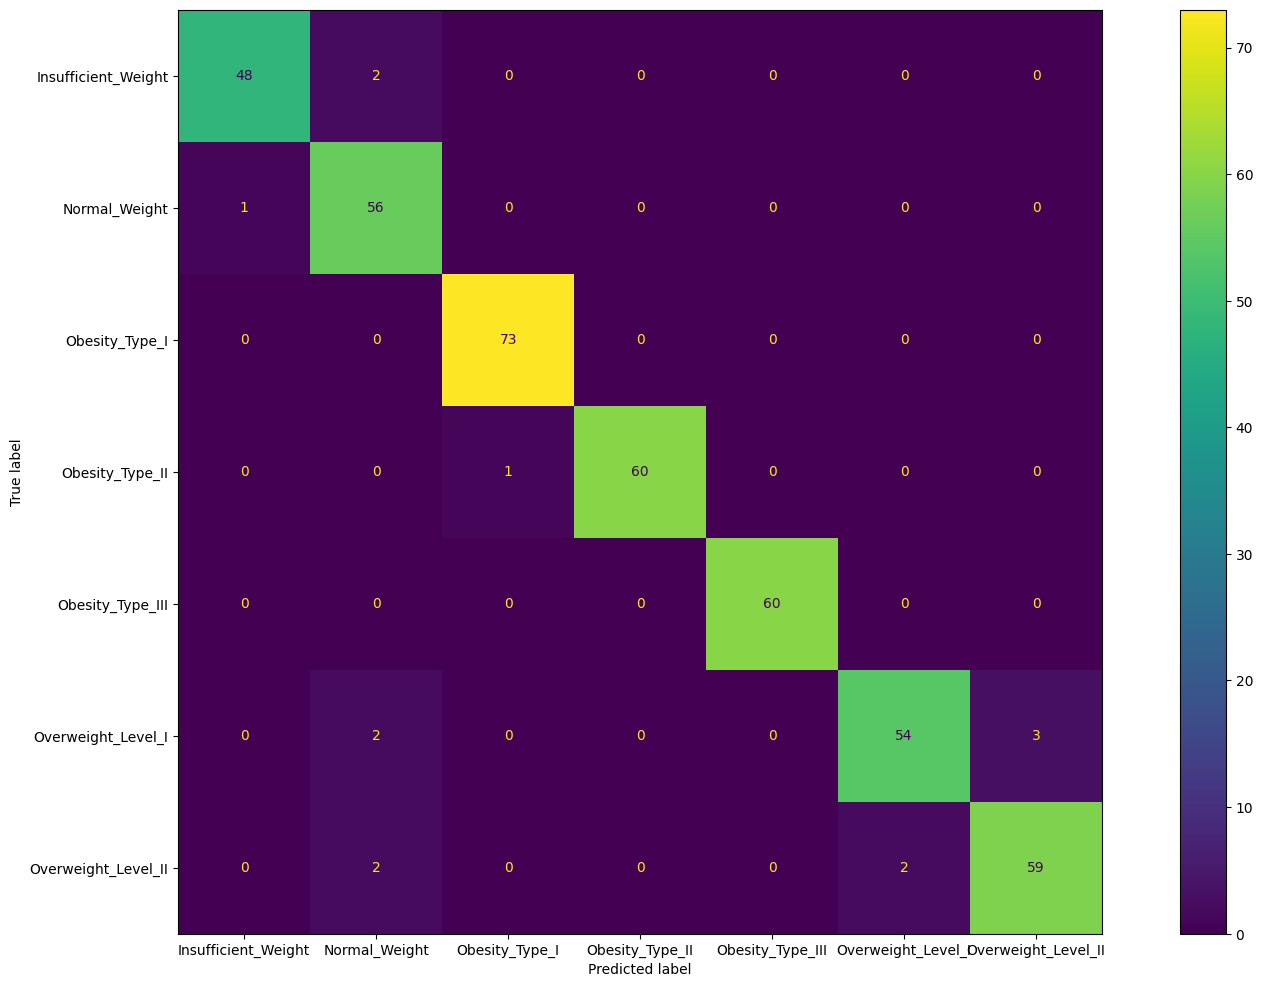

In [100]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(20, 12))
disp = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_)
disp.plot(ax=ax)
plt.show()

## Feature Importance
Wie wichtig sind die einzelnen Features für die Prognose!

In [101]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="Age"), y, test_size=0.2, random_state=3)
# Modell auswählen und trainieren
model = RandomForestClassifier()
grid = GridSearchCV(
    model, # verwendetes Modell
    param_grid, # zu untersuchende Parameter
    cv=5, # Anzahl der Folds
    n_jobs=-1, # Parallelisierung der Ausführung
    scoring="accuracy", # Fehlermaß
)
grid.fit(X_train, y_train)
second_best_model = grid.best_estimator_

In [102]:
# Modell evaluieren
y_pred = second_best_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred) * 100

96.45390070921985

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

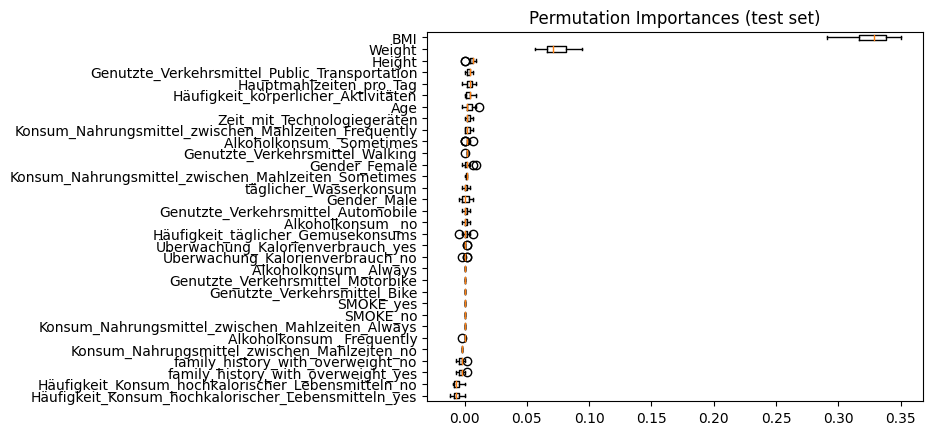

In [104]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=15, random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.show()